### Ionoszféra késleltetés meghatározása Kálmán szűréssel

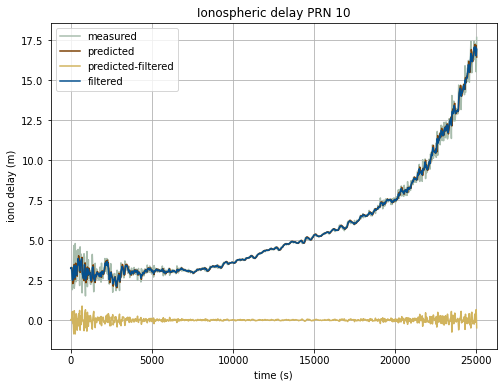

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.common import Q_discrete_white_noise, kinematic_kf

## iono delay measurements
dat = np.loadtxt('ionodelays10.dat',delimiter=',')
ion = dat[:,1]

varm = 0.5  # measurement noise variance
var = 1e-4**2  # state noise variance
#var = 1e-6**2  # bad state noise variance
dt = 30  # time step

def iono1():
    ionofilter = kinematic_kf(dim=1, order=1, dt=dt, dim_z=1)   
    # state covariance matrix
    ionofilter.Q = Q_discrete_white_noise(dim=2, dt=dt, var=var)
    # measurement function
    ionofilter.H = np.array([[1, 0]])
    # measurement noise covariance
    ionofilter.R = np.array([[varm]])
    # initial conditions
    ionofilter.x = np.array([ion[0], 0])
    #ionofilter.x = np.array([10, 0]) # bad initial condition
    ionofilter.P = np.eye(2) * 0.0001
    return ionofilter

#run filter
iono_filter = iono1()
mu, cov, pred, cov_pred = iono_filter.batch_filter(ion)

## Plot the results
t = np.arange(0,int(len(ion)*dt),dt)
plt.figure(figsize=(8,6))
plt.plot(t,ion,label='measured',c='#a8bdad')
plt.plot(t,pred[:,0],label='predicted',c='#7d4105')
plt.plot(t,pred[:,0]-mu[:,0],label='predicted-filtered',c='#d1b45e')
plt.plot(t,mu[:,0],label='filtered',c='#04508f')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('iono delay (m)')
plt.title('Ionospheric delay PRN 10')
plt.grid()
plt.savefig("iono-PRN10-ic10.png",dpi=150)
plt.show()    